In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lModels
import sklearn.discriminant_analysis as DiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
import sklearn.neighbors as NN
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

plt.style.use('ggplot')
train = pd.read_json('./train.json')
test = pd.read_json('./test.json')
border = pd.read_json('./limit.json')

In [2]:
def showGraph(data: pd.core.frame.DataFrame, name: str, yData = None):
    
    if not (yData is None):
        data['y'] = yData
    
    data_0 = data.query('y == 0')
    data_1 = data.query('y == 1')
    
    fig, ax = plt.subplots(figsize=(13, 10))
    ax.set_title(name, fontsize=18)
    ax.set_ylabel("y", fontsize=12)
    ax.set_xlabel("x", fontsize=12)
    ax.scatter(data_0.x1, data_0.x2,  color='red', label='label_0')
    ax.plot(border.x1, border.x2,  color='black', label='border')
    ax.scatter(data_1.x1, data_1.x2,  color='blue', label='label_1')
    ax.legend()
    plt.show()

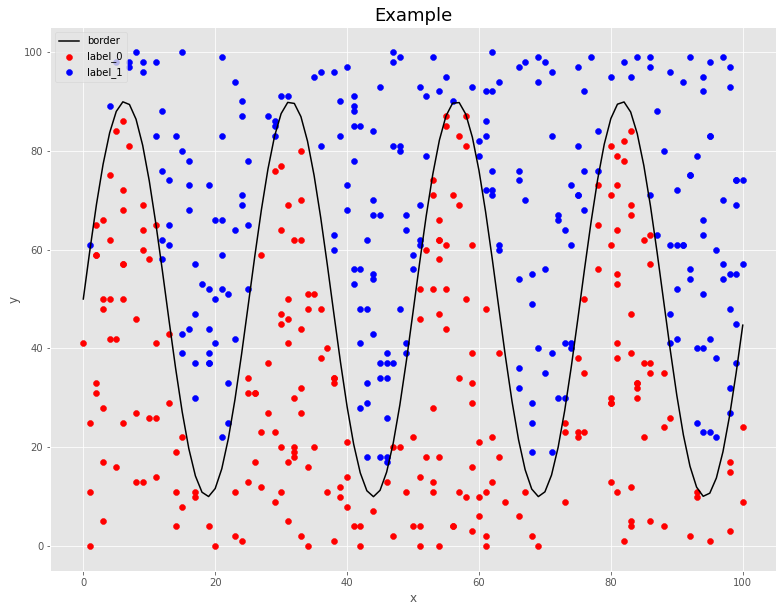

In [3]:
showGraph(train, 'Example')

In [4]:
clf = lModels.RidgeClassifier().fit(train[['x1', 'x2']], train.y)

In [5]:
y_pred = clf.predict(test[['x1', 'x2']])

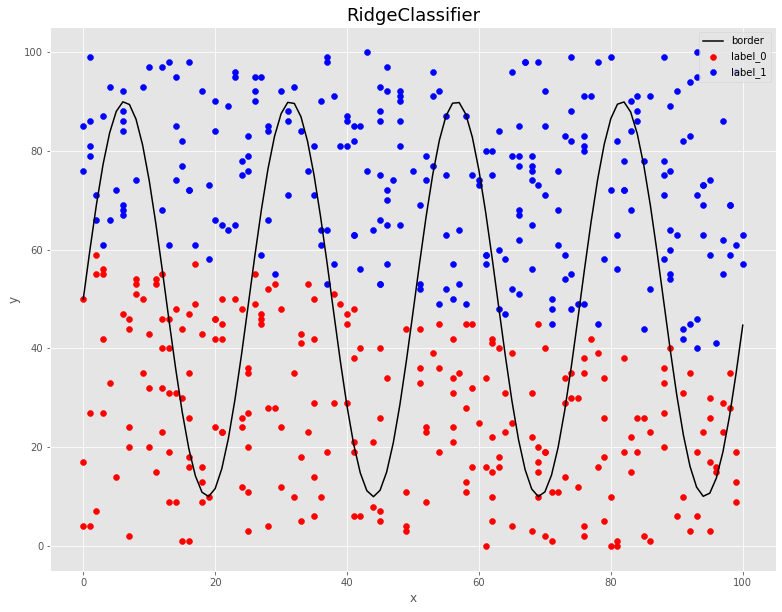

In [6]:
showGraph(test, 'RidgeClassifier', y_pred)

In [7]:

clf = lModels.LogisticRegression().fit(train[['x1', 'x2']], train.y)

In [8]:
y_pred = clf.predict(test[['x1', 'x2']])

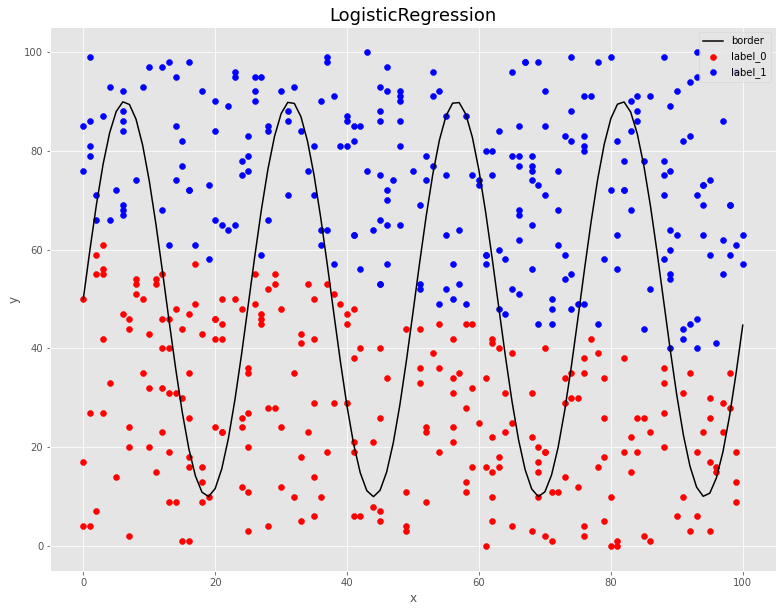

In [9]:
showGraph(test, 'LogisticRegression', y_pred)

In [10]:
clf = make_pipeline(StandardScaler(), lModels.SGDClassifier(max_iter=1000, tol=1e-3))

In [11]:
clf.fit(train[['x1', 'x2']], train.y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [12]:
y_pred = clf.predict(test[['x1', 'x2']])

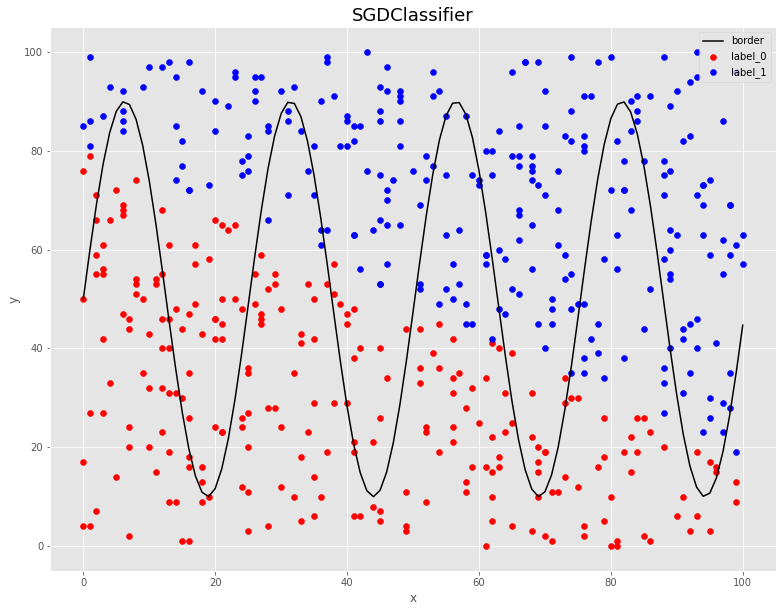

In [13]:
showGraph(test, 'SGDClassifier', y_pred)

In [14]:
clf = lModels.Perceptron(tol=1e-3, random_state=0).fit(train[['x1', 'x2']], train.y)

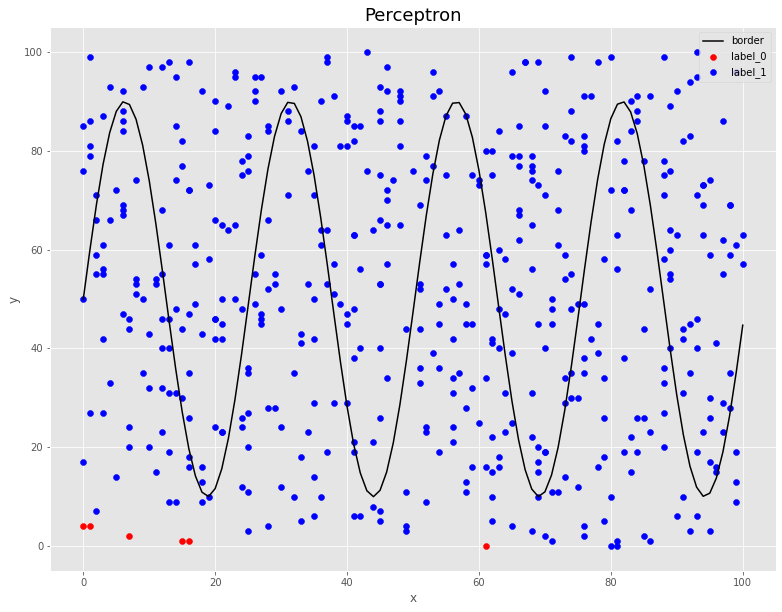

In [15]:
y_pred = clf.predict(test[['x1', 'x2']])
showGraph(test, 'Perceptron', y_pred)

In [16]:
clf = lModels.PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3).fit(train[['x1', 'x2']], train.y)

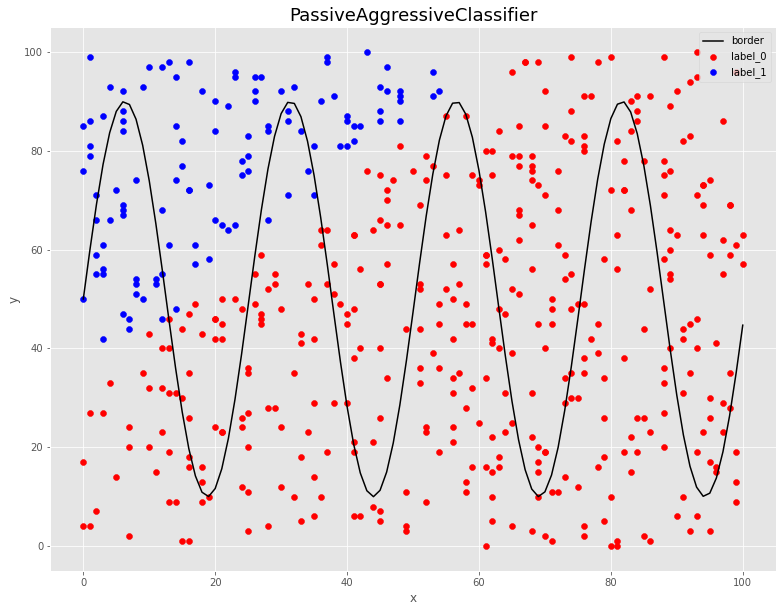

In [17]:
y_pred = clf.predict(test[['x1', 'x2']])
showGraph(test, 'PassiveAggressiveClassifier', y_pred)

In [18]:
clf = DiscriminantAnalysis.LinearDiscriminantAnalysis().fit(train[['x1', 'x2']], train.y)

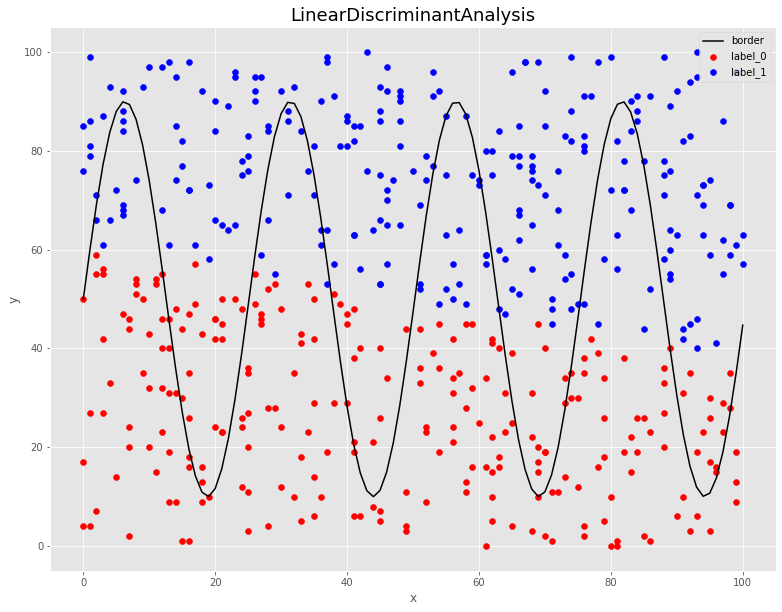

In [19]:
y_pred = clf.predict(test[['x1', 'x2']])
showGraph(test, 'LinearDiscriminantAnalysis', y_pred)

In [20]:
clf = DiscriminantAnalysis.QuadraticDiscriminantAnalysis().fit(train[['x1', 'x2']], train.y)

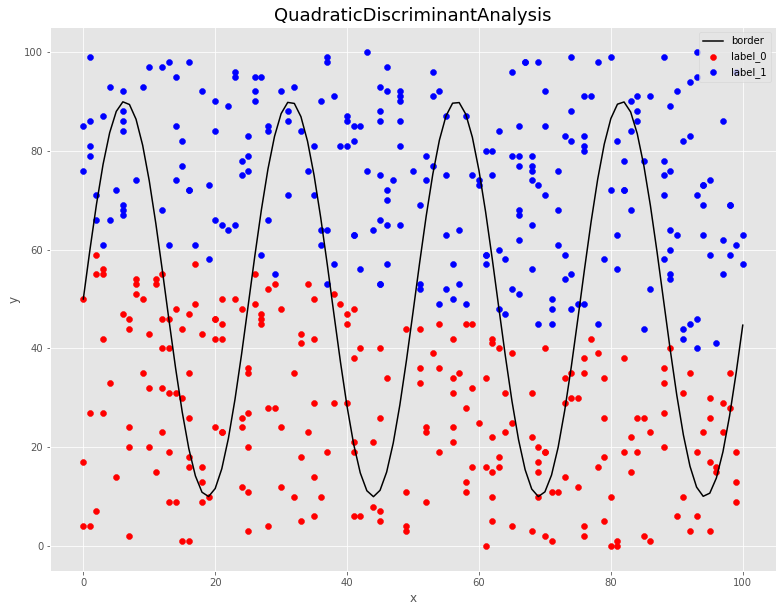

In [21]:
y_pred = clf.predict(test[['x1', 'x2']])
showGraph(test, 'QuadraticDiscriminantAnalysis', y_pred)

In [22]:
clf = svm.SVC().fit(train[['x1', 'x2']], train.y)

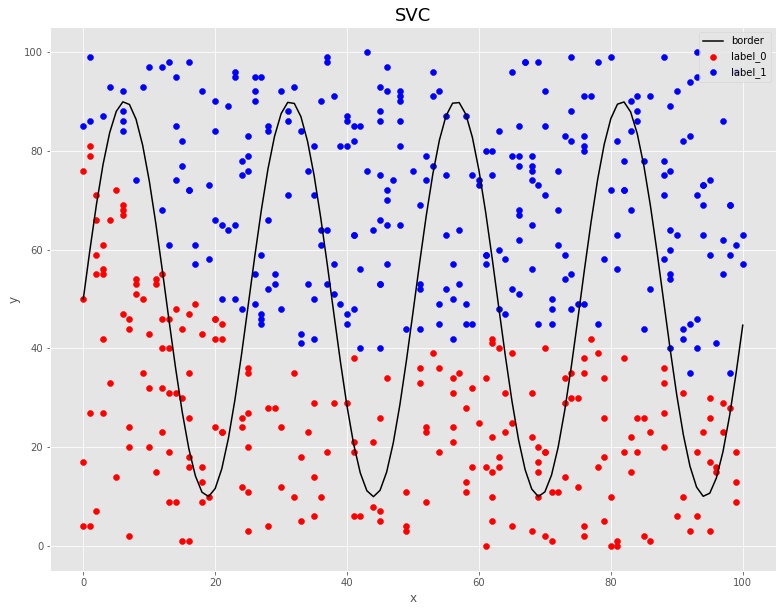

In [23]:
showGraph(test, 'SVC', clf.predict(test[['x1', 'x2']]))

In [24]:
clf = make_pipeline(StandardScaler(), svm.NuSVC())

In [25]:
clf.fit(train[['x1', 'x2']], train.y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('nusvc', NuSVC())])

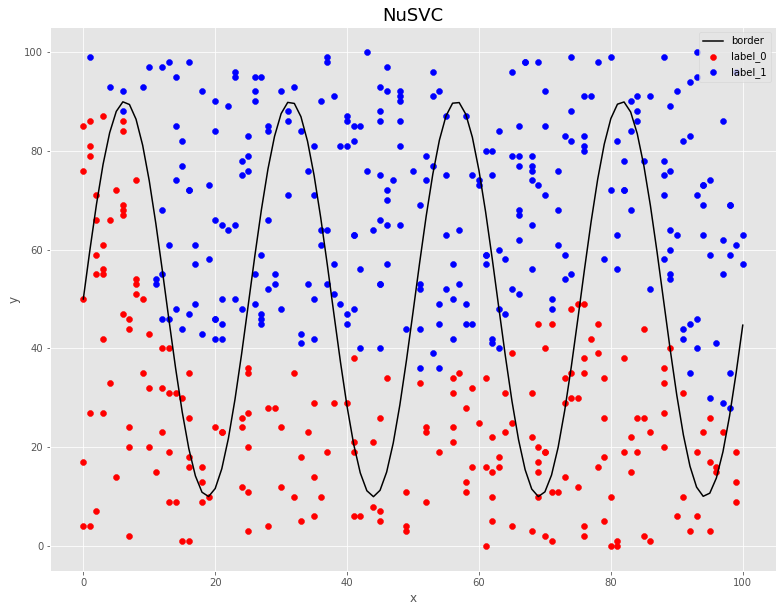

In [26]:
showGraph(test, 'NuSVC', clf.predict(test[['x1', 'x2']]))

In [27]:
clf = make_pipeline(StandardScaler(), svm.LinearSVC(random_state=0, tol=1e-5))

In [28]:
clf.fit(train[['x1', 'x2']], train.y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

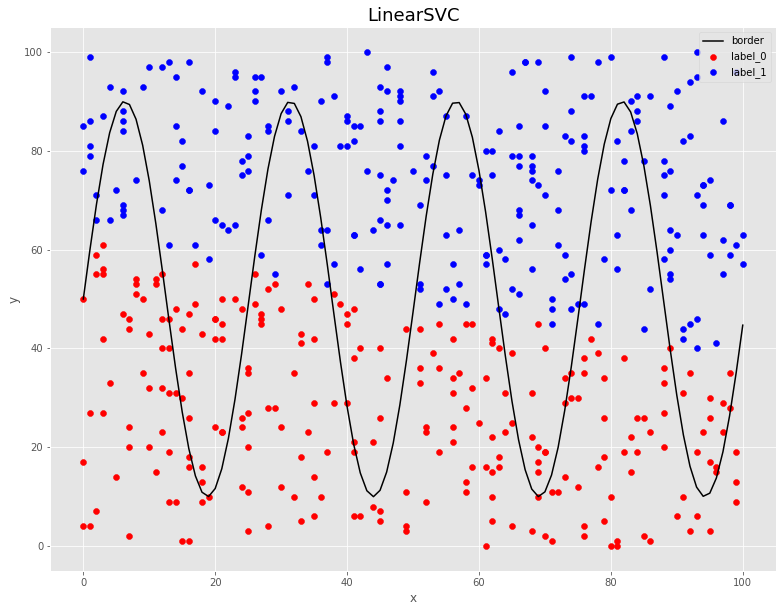

In [29]:
showGraph(test, 'LinearSVC', clf.predict(test[['x1', 'x2']]))

In [30]:
neigh = NN.KNeighborsClassifier(n_neighbors=20).fit(train[['x1', 'x2']], train.y)

In [53]:
#showGraph(test, 'KNeighborsClassifier', neigh.predict(test[['x1', 'x2']]))

In [52]:
neigh = NN.RadiusNeighborsClassifier(radius=1.0).fit(train[['x1', 'x2']], train.y)

In [55]:
#showGraph(test, 'RadiusNeighborsClassifier', neigh.predict(test[['x1', 'x2']]))

In [34]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(train[['x1', 'x2']], train.y)

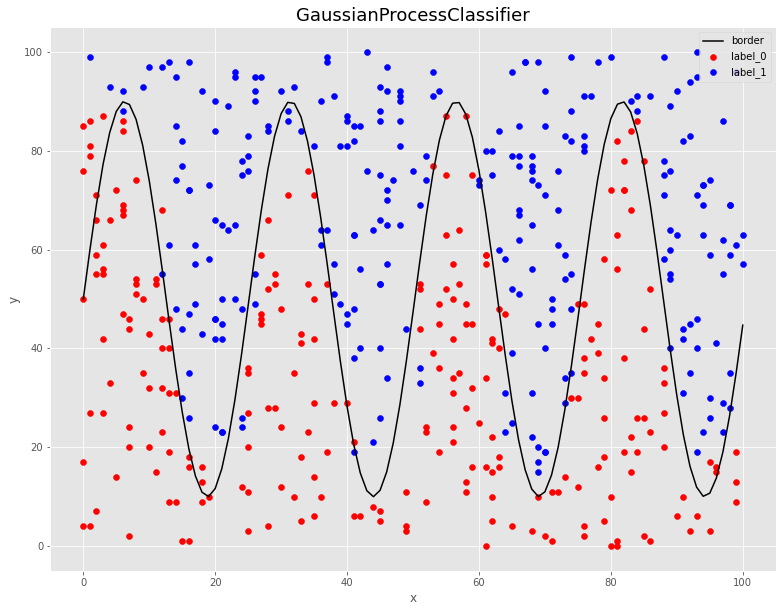

In [56]:
showGraph(test, 'GaussianProcessClassifier', gpc.predict(test[['x1', 'x2']]))

In [36]:
gnb = GaussianNB().fit(train[['x1', 'x2']], train.y)

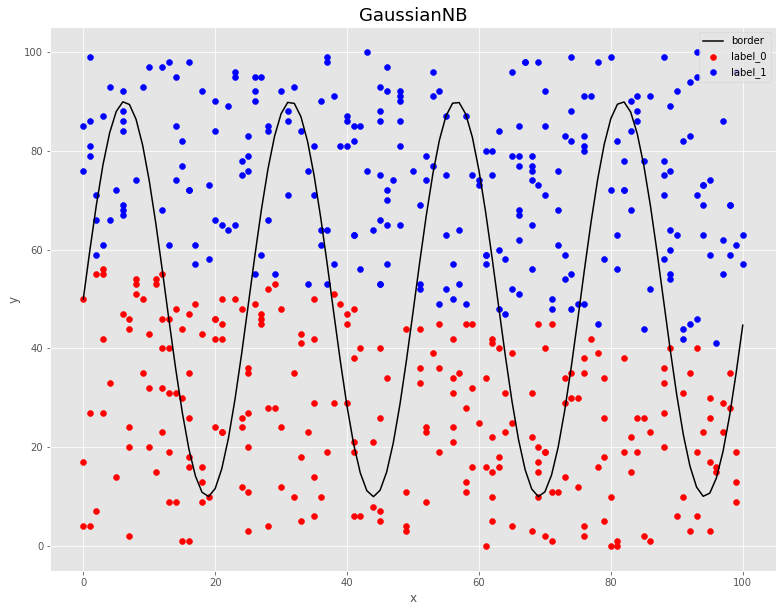

In [57]:
showGraph(test, 'GaussianNB', gnb.predict(test[['x1', 'x2']]))

In [38]:
clf = tree.DecisionTreeClassifier().fit(train[['x1', 'x2']], train.y)

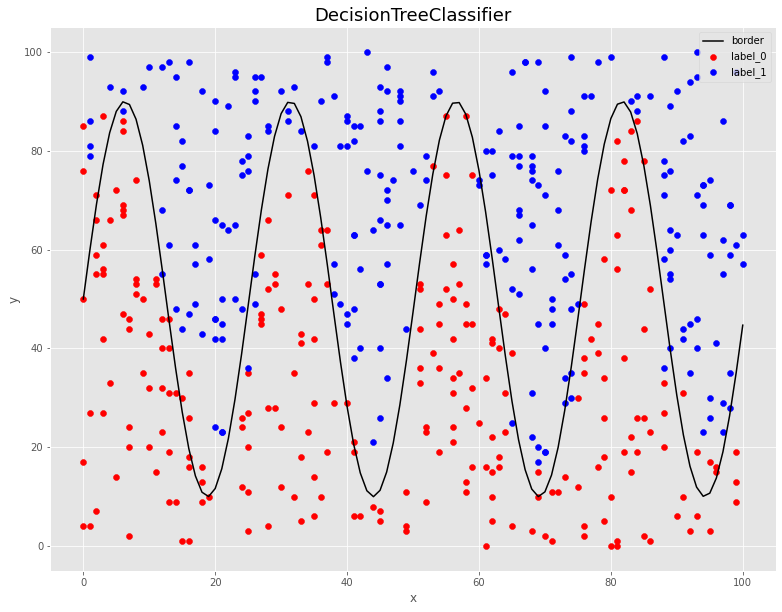

In [39]:
showGraph(test, 'DecisionTreeClassifier', clf.predict(test[['x1', 'x2']]))

In [41]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(train[['x1', 'x2']], train.y)

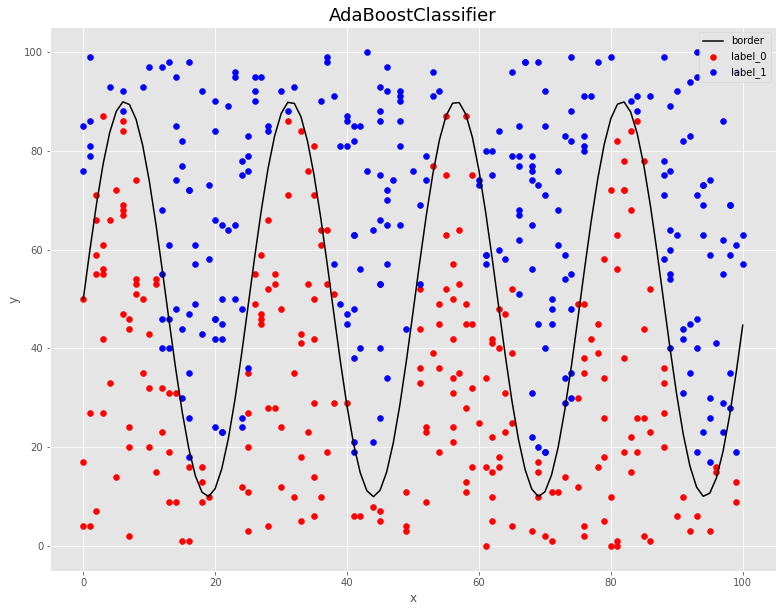

In [42]:
showGraph(test, 'AdaBoostClassifier', clf.predict(test[['x1', 'x2']]))

In [59]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(train[['x1', 'x2']], train.y)

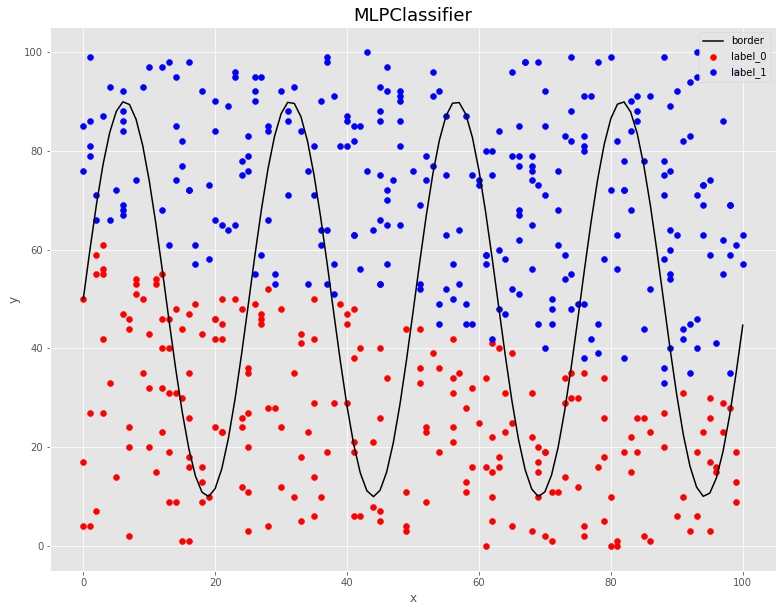

In [60]:
showGraph(test, 'MLPClassifier', clf.predict(test[['x1', 'x2']]))